In [ ]:
# Install required libraries
!pip install torchaudio librosa numpy matplotlib scikit-learn

import os
import torch
import torchaudio
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ensure GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Download the dataset (Example: Google Speech Commands dataset)
# Adding `-nc` flag to wget to avoid redownloading if the file already exists
!wget -nc https://www.openslr.org/resources/28/rirs_noises.zip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 39.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:

# Check if the directory exists, and create it if it doesn't
data_dir = "RIRS_NOISES"  # Correct directory name
if not os.path.exists(data_dir):
    if os.path.exists('rirs_noises.zip'):
        print("Unzipping the dataset...")
        !unzip -q rirs_noises.zip
    else:
        print("Dataset zip file is missing. Please check the download URL.")

# Verify that the directory exists after unzipping
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"Directory '{data_dir}' not found. Please ensure the dataset is downloaded and unzipped correctly.")


Unzipping the dataset...


<ipython-input-4-c762928727a3>:17: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend('sox_io')


Epoch 1, Loss: 0.0056
Epoch 2, Loss: 0.0000
Epoch 3, Loss: 0.0000
Epoch 4, Loss: 0.0000
Epoch 5, Loss: 0.0000
Epoch 6, Loss: 0.0000
Epoch 7, Loss: 0.0000
Epoch 8, Loss: 0.0000
Epoch 9, Loss: 0.0000
Epoch 10, Loss: 0.0000
Accuracy: 1.0000, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


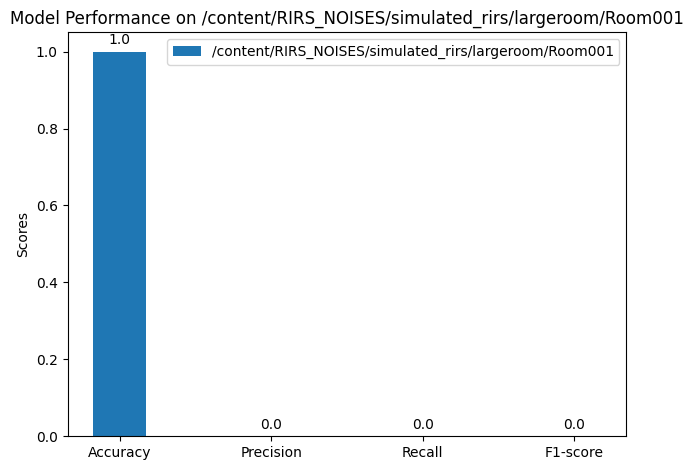

/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1033
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1664
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1600
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=418
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1657
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2032
  warnings.warn(


Epoch 1, Loss: 0.0617
Epoch 2, Loss: 0.0052
Epoch 3, Loss: 0.0021
Epoch 4, Loss: 0.0011
Epoch 5, Loss: 0.0007
Epoch 6, Loss: 0.0005
Epoch 7, Loss: 0.0004
Epoch 8, Loss: 0.0003
Epoch 9, Loss: 0.0002
Epoch 10, Loss: 0.0002
Accuracy: 1.0000, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


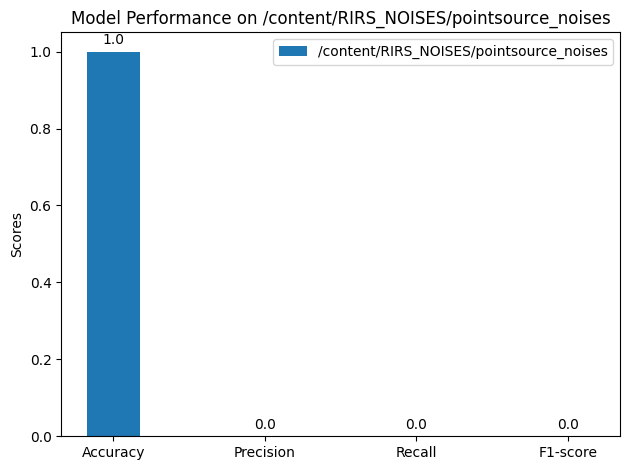

In [ ]:
# Install required libraries
!pip install --upgrade ffmpeg-python

import os
import torch
import torchaudio
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set the backend to 'sox_io' for better compatibility with audio processing
torchaudio.set_audio_backend('sox_io')

# Ensure GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Function to load and preprocess audio
def load_audio(file_path, sample_rate=16000):
    try:
        waveform, sr = torchaudio.load(file_path)

        # Resample if the sample rate doesn't match
        if sr != sample_rate:
            resampler = torchaudio.transforms.Resample(orig_freq=sr, new_freq=sample_rate)
            waveform = resampler(waveform)

        return waveform.numpy().flatten()
    except RuntimeError as e:
        print(f"Error loading audio file: {file_path}")
        print(f"Error message: {e}")
        # Handle the error, e.g., skip the file or return an empty array
        return np.array([])  # Return an empty array for now


# Extract MFCC features
def extract_mfcc_features(audio, sr=16000, n_mfcc=13):
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfccs.T, axis=0)

# Prepare dataset
class VADDataset(Dataset):
    def __init__(self, data_dir, sample_rate=16000):
        self.file_paths = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.wav')]  # Filter for .wav files
        self.labels = [1 if "speech" in f else 0 for f in os.listdir(data_dir) if f.endswith('.wav')]  # Binary classification and filter for .wav files
        self.sample_rate = sample_rate

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        audio = load_audio(self.file_paths[idx], self.sample_rate)
        # Skip this audio sample if loading failed
        if audio.size == 0:
            return None, None
        features = extract_mfcc_features(audio)
        label = self.labels[idx]
        return torch.tensor(features, dtype=torch.float32), torch.tensor(label, dtype=torch.long)



# Define a simple CNN model for VAD
class VADModel(nn.Module):
    def __init__(self):
        super(VADModel, self).__init__()
        self.fc1 = nn.Linear(13, 64)  # Expecting 13 MFCC features per audio sample
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)  # Binary classification

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Function to train and evaluate model
def train_and_evaluate(dataset_path):
    # Load dataset
    dataset = VADDataset(dataset_path)  # Use the dataset path passed
    train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)
    train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

    # Initialize model
    model = VADModel().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train model
    num_epochs = 10
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

    # Evaluate model
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())

    # Compute evaluation metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

       # Plotting the results for this dataset
    metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    metrics_values = [accuracy, precision, recall, f1]

    x = np.arange(len(metrics_labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects = ax.bar(x, metrics_values, width, label=dataset_path)

    ax.set_ylabel('Scores')
    ax.set_title(f'Model Performance on {dataset_path}')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics_labels)
    ax.legend()

    # Function to autolabel the bars
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects)
    fig.tight_layout()
    plt.show()


# Call the function with the dataset paths
train_and_evaluate("/content/RIRS_NOISES/simulated_rirs/largeroom/Room001")  # first dataset
train_and_evaluate("/content/RIRS_NOISES/pointsource_noises")  # second dataset
#train_and_evaluate("/content/RIRS_NOISES/real_rirs_isotropic_noises")  # third dataset
